In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('datasets/DataAnalyst.csv', index_col=0)

In [3]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda val : val.split()[0])

In [4]:
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1
2252,Senior Quality Data Analyst,$78K-$104K,"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [4]:
len(df['Job Title'].unique())

1272

In [14]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.Rating = df.Rating.apply(lambda x: np.nan if x<0 else x)
df.Founded = df.Founded.apply(lambda x: np.nan if x<0 else x)
df = df.replace(['-1'], np.nan)

df['Company Name'] = df['Company Name'].str.split('\n').str[0]

df["Salary Estimate"] = df["Salary Estimate"].str.replace("\(Glassdoor est.\)", "")
df["Salary Estimate"] = df["Salary Estimate"].str.replace("K", "")
df[['Salary Lower bound','Salary Upper bound']] = df["Salary Estimate"].str.split("-",expand=True)

df["Salary Lower bound"] = df["Salary Lower bound"].str.replace("$", "")
df["Salary Upper bound"] = df["Salary Upper bound"].str.replace("$", "")

df["Salary Lower bound"] = pd.to_numeric(df["Salary Lower bound"])
df["Salary Upper bound"] = pd.to_numeric(df["Salary Upper bound"])

df[["City", "State", "None"]] = df["Location"] = pd.DataFrame(df.Location.str.split(",", expand = True))

In [15]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound,City,State,None
0,"Data Analyst, Center on Immigration and Justic...",$37-$66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,"New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY,None
1,Quality Data Analyst,$37-$66,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,"New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY,None
2,"Senior Data Analyst, Insights & Analytics Team...",$37-$66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,"New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY,None
3,Data Analyst,$37-$66,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,"McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY,None
4,Reporting Data Analyst,$37-$66,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,New York,"New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY,None


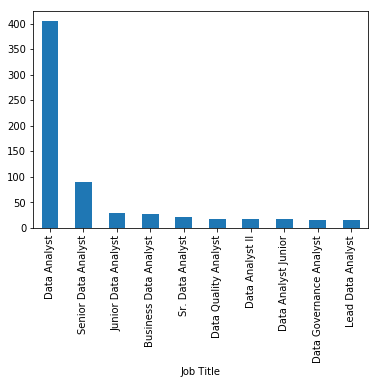

In [15]:
df.groupby('Job Title').count().sort_values('Location', ascending=False)[:10]['Location'].plot(kind='bar')

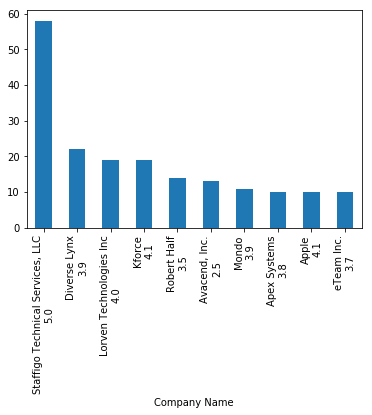

In [18]:
df.groupby('Company Name').count().sort_values('Location', ascending=False)[:10]['Location'].plot(kind='bar')

In [21]:
len(df['Sector'].unique())

25

## Salary Estimates

In [20]:
df['Salary Estimate'].unique()

array(['$37K-$66K', '$46K-$87K', '$51K-$88K', '$51K-$87K', '$59K-$85K',
       '$43K-$76K', '$60K-$110K', '$41K-$78K', '$45K-$88K', '$73K-$127K',
       '$84K-$90K', '$27K-$52K', '$42K-$74K', '$77K-$132K', '$98K-$114K',
       '$48K-$96K', '$26K-$47K', '$31K-$59K', '$47K-$81K', '$43K-$69K',
       '$49K-$112K', '$30K-$54K', '$55K-$103K', '$37K-$70K', '$57K-$103K',
       '$35K-$45K', '$42K-$66K', '$65K-$81K', '$113K-$132K', '$42K-$63K',
       '$60K-$66K', '$73K-$82K', '$67K-$92K', '$42K-$76K', '$97K-$129K',
       '$68K-$87K', '$29K-$38K', '$47K-$76K', '$74K-$123K', '$53K-$94K',
       '$46K-$102K', '$43K-$94K', '$45K-$78K', '$38K-$68K', '$37K-$44K',
       '$64K-$113K', '$50K-$93K', '$37K-$68K', '$73K-$89K', '$76K-$122K',
       '$60K-$124K', '$34K-$61K', '$24K-$48K', '$30K-$53K', '$41K-$86K',
       '$44K-$82K', '$48K-$88K', '$44K-$78K', '$110K-$190K', '$89K-$151K',
       '$69K-$127K', '$51K-$93K', '$58K-$93K', '$63K-$116K', '$53K-$104K',
       '$35K-$42K', '$43K-$77K', '$40K-$72K

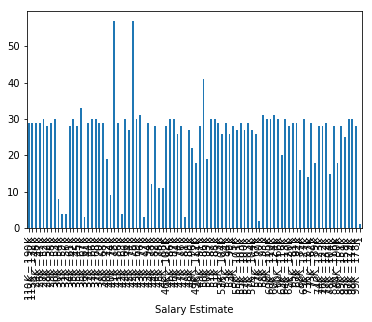

In [22]:
df.groupby('Salary Estimate').count()['Job Title'].plot(kind = 'bar')

In [11]:
df['Company Name'] = df['Company Name'].map(lambda name : str(name).split('\n')[0])

In [18]:
df.groupby('Company Name').count().sort_values('Rating', ascending= False)

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
Company Name,,,,,,,,,,,,,,
"Staffigo Technical Services, LLC",58,58,58,58,58,58,58,58,58,58,58,58,58,58
Diverse Lynx,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Lorven Technologies Inc,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Kforce,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Robert Half,14,14,14,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCL Technologies Ltd.,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HCL Global Systems,1,1,1,1,1,1,1,1,1,1,1,1,1,1
HCL America Inc.,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
df['Company Name'].map(lambda x: x.split())

AttributeError: 'float' object has no attribute 'split'

In [17]:
df['Company Name'].unique()

1502

In [21]:
df.groupby('Company Name').count().sort_values('Job Title', ascending= False)['Job Title']

Company Name
Staffigo Technical Services, LLC      58
Diverse Lynx                          22
Lorven Technologies Inc               19
Kforce                                19
Robert Half                           14
                                      ..
HCL Technologies Ltd.                  1
HCL Global Systems                     1
HCL America Inc.                       1
H-GAC                                  1
zz-Tarzana Treatment Centers, Inc.     1
Name: Job Title, Length: 1501, dtype: int64

In [24]:
df[df['Company Name'] == 'Diverse Lynx']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound,City,State,None
69,Data/Reporting Analyst,$51-$88,Position Summary\nA data management/analyst wh...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,51.0,88.0,New York,NY,None
171,Healthcare Data/Reporting Analyst,$43-$76,Below JD:\nJob Title: Healthcare Data/Reportin...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,43.0,76.0,New York,NY,None
250,Data Engineer/Data Analyst,$45-$88,Title: Data Engineer/Data Analyst\nLocation: N...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,45.0,88.0,New York,NY,None
268,Data Analyst with Python or Python developer,$84-$90,Role: Data Analyst with Python or Python devel...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,84.0,90.0,New York,NY,None
274,Data Analyst with Python,$84-$90,Title: Role: Data Analyst with Python or Pytho...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,84.0,90.0,New York,NY,None
321,NY Healthcare Data/Reporting Analyst,$42-$74,Job Description:\n\nPosition Summary\nA data m...,3.9,Diverse Lynx,New York,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,42.0,74.0,New York,NY,None
768,Data Analyst,$73-$82,"Role: Data Analyst\nLocation: Chicago, IL(Loca...",3.9,Diverse Lynx,Chicago,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,73.0,82.0,Chicago,IL,None
984,Data Analyst,$53-$94,Role: SAS/Python Data Analyst\nExperience:6+ Y...,3.9,Diverse Lynx,Tempe,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,53.0,94.0,Tempe,AZ,None
1028,Data Analyst/Business Analyst with SQL,$43-$94,Job Roles / Responsibilities:\nData Migration ...,3.9,Diverse Lynx,Phoenix,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,43.0,94.0,Phoenix,AZ,None
1176,AWS Analys/ Data analyst,$64-$113,Role: AWS Analys/ Data analyst\nLocation: Malv...,3.9,Diverse Lynx,Malvern,"Princeton, NJ",501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,64.0,113.0,Malvern,PA,None


In [25]:
import wordcloud

In [29]:
title_text = ' '.join(df['Job Title'].values)

In [33]:
len(title_text.split())

9342

In [41]:
wc = wordcloud.WordCloud(width=1600, height=900, background_color='white')

In [45]:
wc.generate(','.join(df['Job Title'].values)).to_file('title_cloud.png')

In [46]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower bound,Salary Upper bound,City,State,None
0,"Data Analyst, Center on Immigration and Justic...",$37-$66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,"New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY,None
1,Quality Data Analyst,$37-$66,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,"New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY,None
2,"Senior Data Analyst, Insights & Analytics Team...",$37-$66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,"New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY,None
3,Data Analyst,$37-$66,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,"McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY,None
4,Reporting Data Analyst,$37-$66,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,New York,"New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY,None
